In [2]:
import pandas as pd 

#load the dataset
titanic_data = pd.read_csv("V:/7 Mentors/Titanic Project/train.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 # Data Exploration and Data Cleaning

In [4]:
#Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#Basic Statistics
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
#Filling the missing Age values with the median or mean

titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [8]:
#Dropping the Cabin column if it's mostly missing.

titanic_data.drop(['Cabin'], axis=1, inplace = True)

In [9]:
#Drop rows with missing values Embarked Column

titanic_data.dropna(subset=['Embarked'],inplace= True)

In [10]:
#Confirm that missing values are handles

print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Feature Engineering

we will convert categorical variables to numerical ones and select the features to be used in the model

In [11]:
#Convert 'Sex' to numerical: 0 for 'female', 1 for male 

titanic_data['Sex'] = titanic_data['Sex'].map({'female':0, 'male':1})

In [12]:
#Fill missing Embarked with the most common valjues  

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)

In [13]:
# Convert 'Embarked' column to numerical (0 for S, 1 for C, 2 for Q)

titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [14]:
#Select features to be used in the model

Features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']

In [15]:
x = titanic_data[Features]
y = titanic_data['Survived']

In [16]:
print(x.head())

   Pclass  Sex   Age     Fare  Embarked  SibSp  Parch
0       3    1  22.0   7.2500         0      1      0
1       1    0  38.0  71.2833         1      1      0
2       3    0  26.0   7.9250         0      0      0
3       1    0  35.0  53.1000         0      1      0
4       3    1  35.0   8.0500         0      0      0


In [17]:
print(y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


 # Split Data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV

#split the dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Print the Shape of the trainig and test sets 
print(f"Training set: {x_train.shape}, Testing set: {x_test.shape}")

Training set: (711, 7), Testing set: (178, 7)


# Build the Model(Random Forest Classifier)

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Initiate Random Forest Model 
model = RandomForestClassifier(n_estimators = 100, random_state= 42)

#Train the model on the training data
model.fit(x_train, y_train)

#Make Predictions on the test data 
y_pred = model.predict(x_test)

# Model Accuracy

simply tells how many correct predictions were made out of all predictions.

In [25]:
from sklearn.metrics import accuracy_score

#Evaluate the Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:2f}%")


Accuracy: 77.528090%


# Hyperparameter Tuning

In [26]:
# RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 20, None],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether to bootstrap the samples
}


In [28]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [30]:
# Train the best model
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 76.40%


# Analyze Feature Importance

Let's see which features are the most important in determining survival.

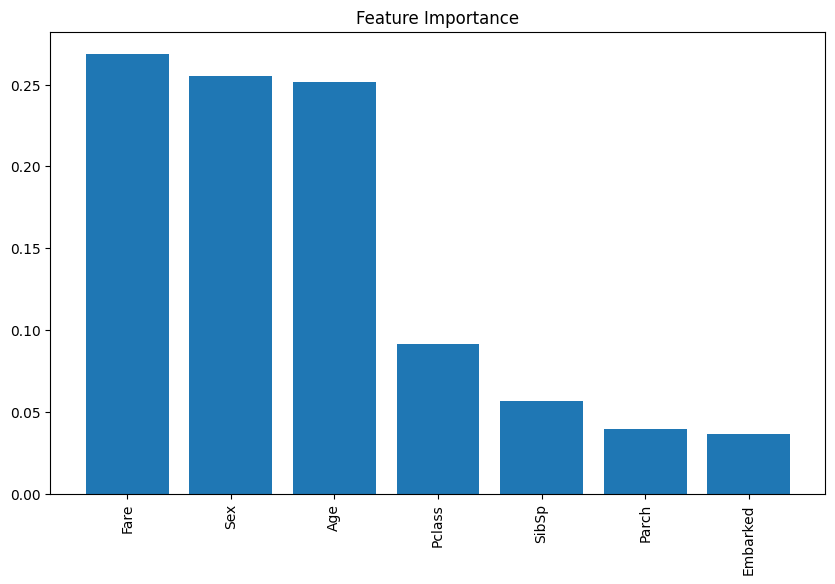

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#Get feature importance from the Random Forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#plot the feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], align= 'center')
plt.xticks(range(x.shape[1]), [Features[i] for i in indices], rotation = 90)
plt.show()

# Confusion Matrix

In this we will find out how many correctly predicted survivors, how many correctly predicted nonm-survivors, 
how  many incorrectly predicted survivors(they didn't survive) and how many incorrectly predicted non-survivors(they actually survived.)

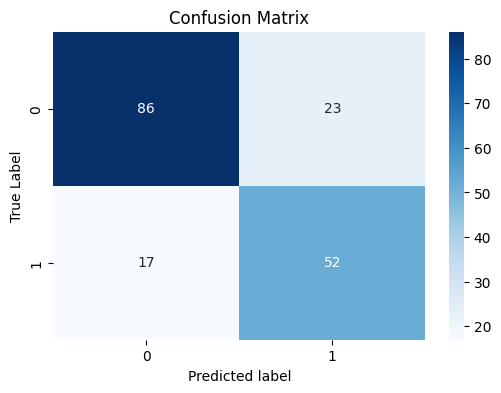

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize confusin matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

# Precision, Recall, f1-Score

Precision tells out of all survivors, how many were actually survivors, Recall tells out of all actual survivors, how nmany were correctly predicted, F-1 score  is a balance between precision and recall

In [55]:
from sklearn.metrics import classification_report

#Generate Classification report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



# ROC Curve and AUC (Area Under Curve)

The ROC Curve(Receiver Operating Characteristics) is a plot that shows the tradeoff between the positive rate and false positive rate. The AUC measures the overall ability of the model to distinguish between positive and negative classes.

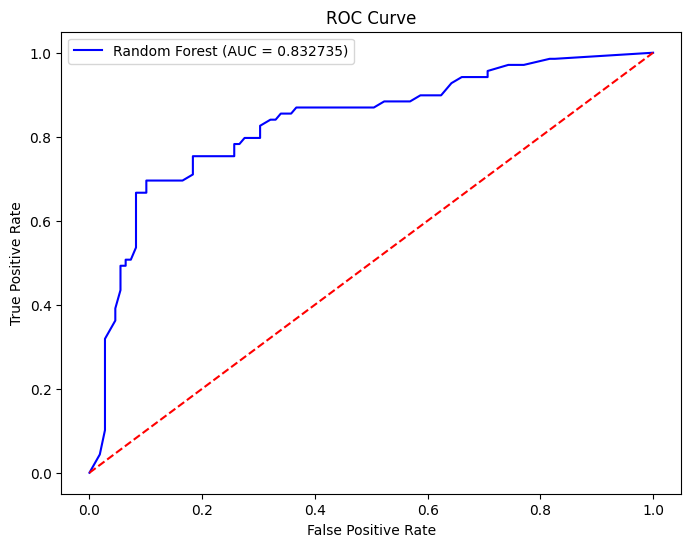

AUC Score:  0.83


In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

#predict probablities for roc curve
y_pred_proba = model.predict_proba(x_test)[:,1]

# computer roc auc score
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Generate ROC curve data 
fpr, tpr, thershold = roc_curve(y_test, y_pred_proba)

#Plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label=f"Random Forest (AUC = { roc_auc:2f})", color ='b')
plt.plot([0,1],[0,1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#print AUC score
print(f"AUC Score: {roc_auc: .2f}")

# Cross Validation

To ensure model generalizes well across different subsets of the data, we can use different subset of data, we can use cross validation

In [57]:
from sklearn.model_selection import cross_val_score

#Perform 5-fold cross validation
cv_scores = cross_val_score(model, x, y, cv=5)

#print cross validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%')

Cross-Validation Scores: [0.78651685 0.80898876 0.86516854 0.78651685 0.83615819]
Mean Cross-Validation Score: 81.67%


In [60]:
# Example 
Features_column = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']
new_passenger = pd.DataFrame([[3,1,25, 7.25,0,1,0]], columns= Features_column)
if 'model' in locals():    
    survival_prediction = model.predict(new_passenger)
    print("Prediction (1 = Survived, 0 = Did not survived):", survival_prediction[0])
else:
    print("The model has not been trained yet")

Prediction (1 = Survived, 0 = Did not survived): 0
